In [1]:
!pip install gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [gdown]


In [2]:
FILE_ID = "1eto0eLQV3hGqm_8glxeDlA9ZqQIfGcp7"

In [1]:
!gdown 1eto0eLQV3hGqm_8glxeDlA9ZqQIfGcp7 

Downloading...
From (original): https://drive.google.com/uc?id=1eto0eLQV3hGqm_8glxeDlA9ZqQIfGcp7
From (redirected): https://drive.google.com/uc?id=1eto0eLQV3hGqm_8glxeDlA9ZqQIfGcp7&confirm=t&uuid=8feee62d-9171-4ec4-bee7-7daec661347d
To: /teamspace/studios/this_studio/Final_Fine_Tunning_YOLO.zip
100%|███████████████████████████████████████| 2.41G/2.41G [00:20<00:00, 117MB/s]


In [2]:
!mkdir -p /teamspace/studios/this_studio/data

In [3]:
!unzip -q /teamspace/studios/this_studio/Final_Fine_Tunning_YOLO.zip -d /teamspace/studios/this_studio/data

In [4]:
!ls -la /teamspace/studios/this_studio/data

total 12
drwxr-xr-x 3 ramyahmedaly16 ramyahmedaly16 4096 Dec  9 13:22 .
drwxr-xr-x 1 ramyahmedaly16 ramyahmedaly16 4096 Dec  9 13:21 ..
drwxr-xr-x 4 ramyahmedaly16 ramyahmedaly16 4096 Dec  7 17:37 Final_Fine_Tunning_YOLO


In [6]:
!ls /teamspace/studios/this_studio/data/Final_Fine_Tunning_YOLO/train/images | head -10

img_000001.jpg
img_000002.jpg
img_000003.jpg
img_000004.jpg
img_000005.jpg
img_000006.jpg
img_000007.jpg
img_000008.jpg
img_000009.jpg
img_000010.jpg
ls: write error: Broken pipe


In [8]:
!ls /teamspace/studios/this_studio/data/Final_Fine_Tunning_YOLO/train/labels | head -10

img_000001.txt
img_000002.txt
img_000003.txt
img_000004.txt
img_000005.txt
img_000006.txt
img_000007.txt
img_000008.txt
img_000009.txt
img_000010.txt
ls: write error: Broken pipe


In [9]:
!cat /teamspace/studios/this_studio/data/Final_Fine_Tunning_YOLO/data.yaml

nc: 4
names:
  - knife
  - fire
  - fighting
  - weapon
train: train/images
val: val/images


In [10]:
!mkdir -p /teamspace/studios/this_studio/data

In [11]:
!mv /teamspace/studios/this_studio/data/Final_Fine_Tunning_YOLO/* /teamspace/studios/this_studio/data/

In [12]:
data_yaml = "/teamspace/studios/this_studio/data/data.yaml"

In [13]:
!sed -i 's|train: .*|train: /teamspace/studios/this_studio/data/train/images|' {data_yaml}

In [14]:
!sed -i 's|val: .*|val: /teamspace/studios/this_studio/data/val/images|' {data_yaml}

In [15]:
!sed -i '1i path: /teamspace/studios/this_studio/data' {data_yaml}

In [16]:
!cat {data_yaml}

path: /teamspace/studios/this_studio/data
nc: 4
names:
  - knife
  - fire
  - fighting
  - weapon
train: /teamspace/studios/this_studio/data/train/images
val: /teamspace/studios/this_studio/data/val/images


In [17]:
!ls /teamspace/studios/this_studio/data/train/images | head -5

img_000001.jpg
img_000002.jpg
img_000003.jpg
img_000004.jpg
img_000005.jpg
ls: write error: Broken pipe


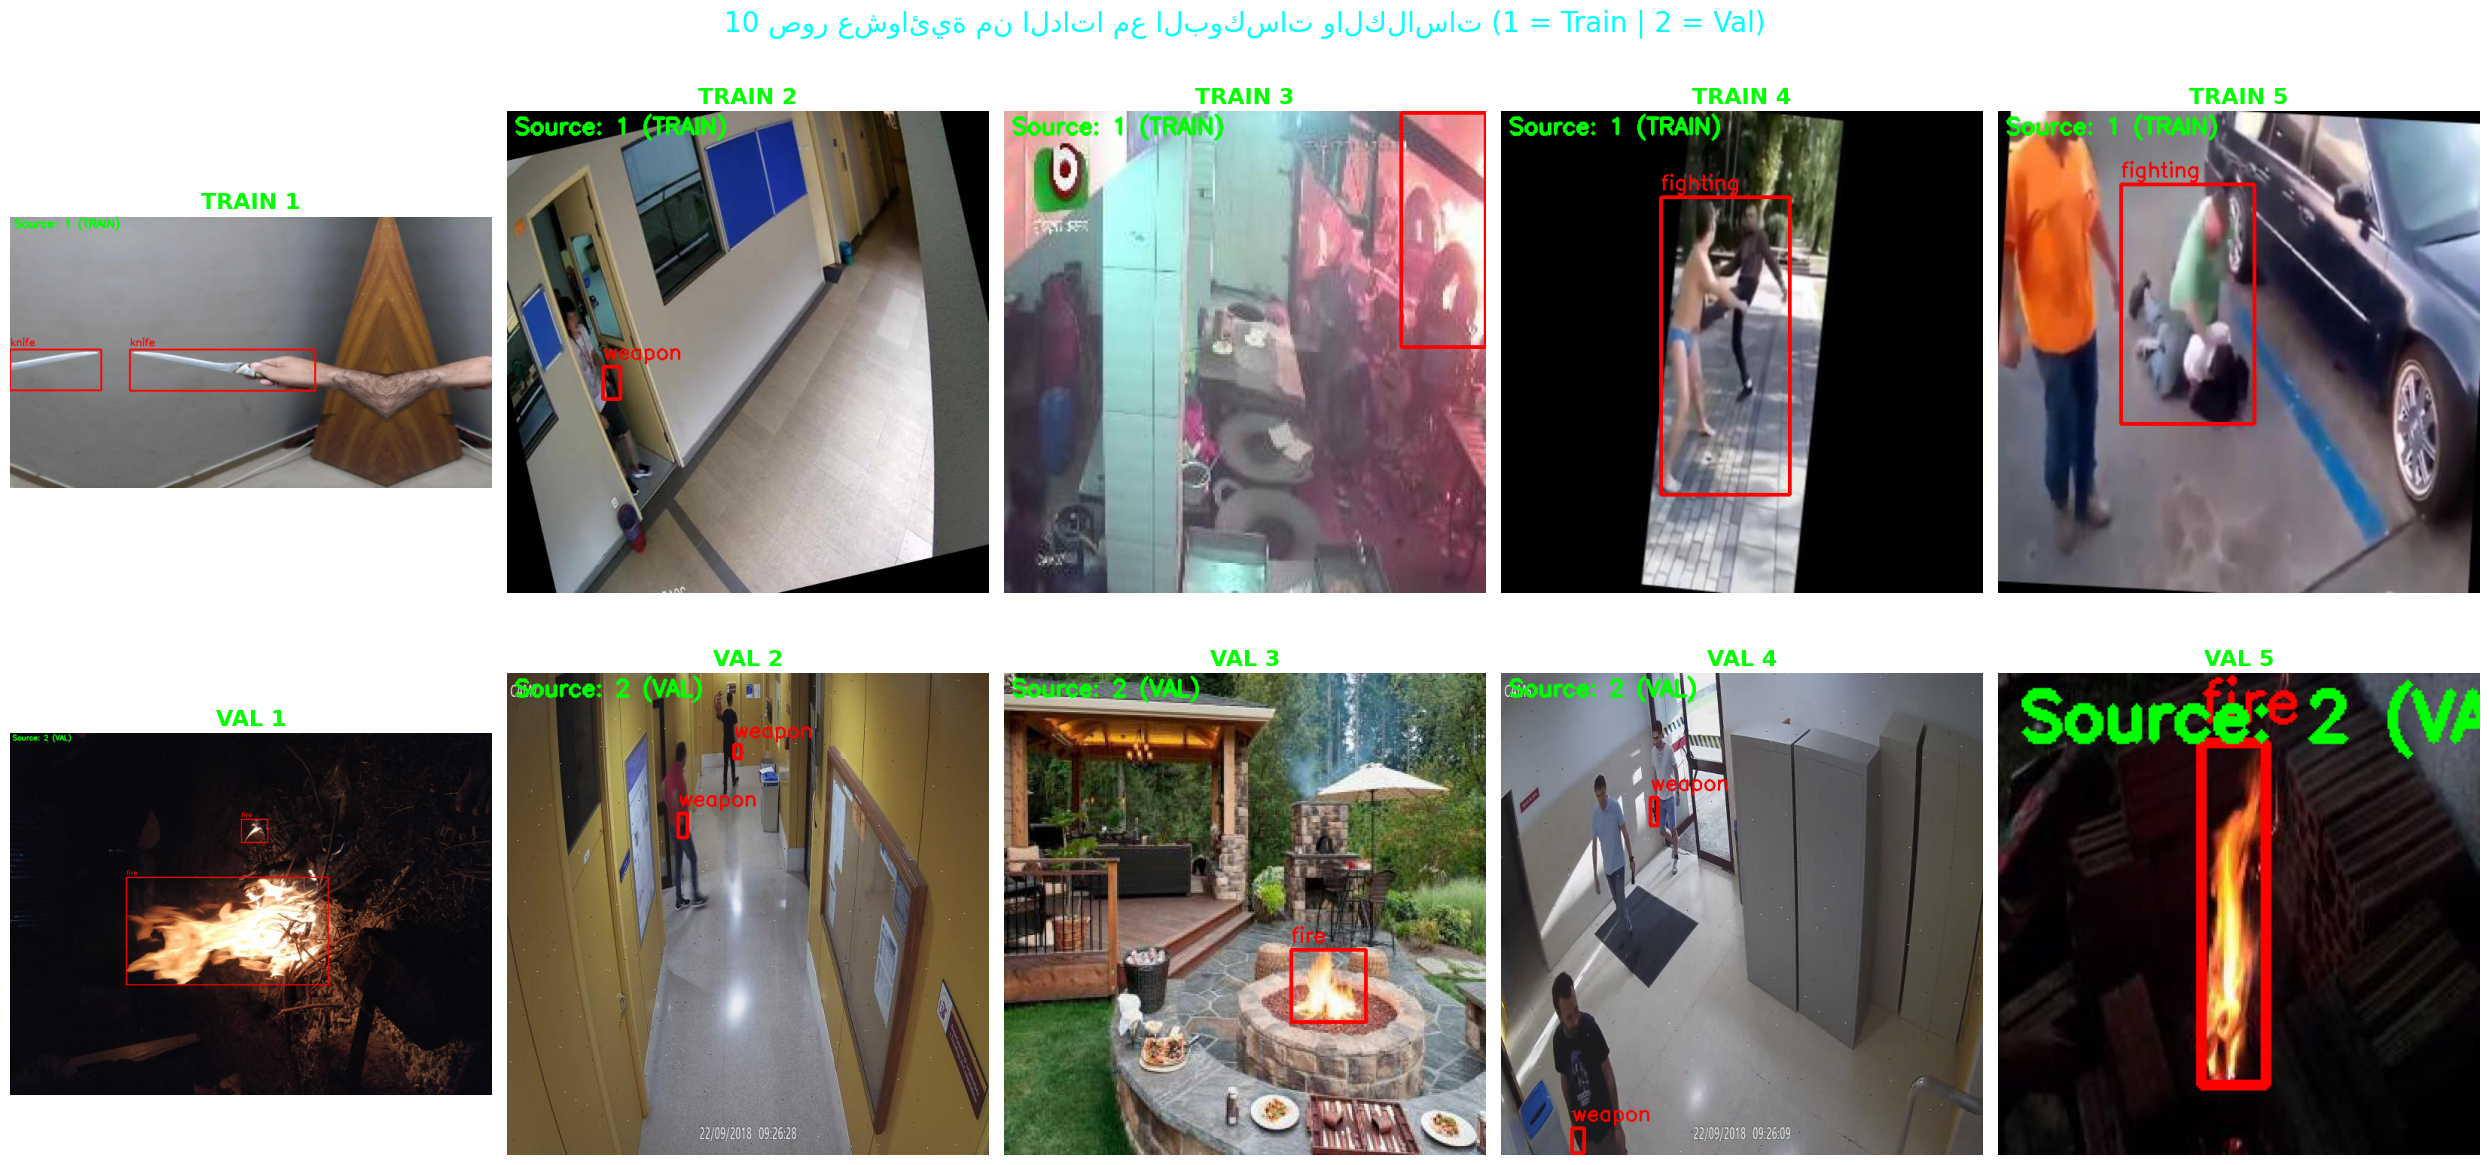

الداتا تمام 100% يا وحش! البوكسات موجودة والكلاسات صحيحة


In [23]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# المسارات
train_img_dir = "/teamspace/studios/this_studio/data/train/images"
train_lbl_dir = "/teamspace/studios/this_studio/data/train/labels"
val_img_dir = "/teamspace/studios/this_studio/data/val/images"
val_lbl_dir = "/teamspace/studios/this_studio/data/val/labels"

# أسماء الكلاسات
class_names = ['knife', 'fire', 'fighting', 'weapon']
colors = ['red', 'orange', 'yellow', 'purple']

# دالة لرسم الصورة مع البوكسات
def draw_image_with_boxes(img_path, lbl_path, source_type):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    
    if os.path.exists(lbl_path):
        with open(lbl_path, 'r') as f:
            for line in f.readlines():
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                class_id = int(class_id)
                
                # تحويل من YOLO format إلى pixels
                x1 = int((x_center - width/2) * w)
                y1 = int((y_center - height/2) * h)
                x2 = int((x_center + width/2) * w)
                y2 = int((y_center + height/2) * h)
                
                # رسم البوكس والليبل
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
                cv2.putText(img, class_names[class_id], (x1, y1-10), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # إضافة رقم المصدر
    cv2.putText(img, f"Source: {source_type}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    
    return img

# اختيار 5 صور عشوائية من train و 5 من val
train_images = random.sample(os.listdir(train_img_dir), 5)
val_images = random.sample(os.listdir(val_img_dir), 5)

# جمع الصور
images_to_show = []
titles = []

for i, img_name in enumerate(train_images):
    img_path = os.path.join(train_img_dir, img_name)
    lbl_path = os.path.join(train_lbl_dir, img_name.replace(".jpg", ".txt"))
    img = draw_image_with_boxes(img_path, lbl_path, "1 (TRAIN)")
    images_to_show.append(img)
    titles.append(f"TRAIN {i+1}")

for i, img_name in enumerate(val_images):
    img_path = os.path.join(val_img_dir, img_name)
    lbl_path = os.path.join(val_lbl_dir, img_name.replace(".jpg", ".txt"))
    img = draw_image_with_boxes(img_path, lbl_path, "2 (VAL)")
    images_to_show.append(img)
    titles.append(f"VAL {i+1}")

# عرض 10 صور في grid 2×5
fig, axes = plt.subplots(2, 5, figsize=(25, 12))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(images_to_show[i])
    axes[i].set_title(titles[i], fontsize=16, color='lime', fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("10 صور عشوائية من الداتا مع البوكسات والكلاسات (1 = Train | 2 = Val)", 
             fontsize=20, y=1.02, color='cyan')
plt.show()

print("الداتا تمام 100% يا وحش! البوكسات موجودة والكلاسات صحيحة")

In [21]:
!pip install -q opencv-python-headless matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.6 which is incompatible.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.6 which is incompatible.


In [25]:
!pip install -q ultralytics

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.2.6 which is incompatible.


In [26]:
from ultralytics import YOLO
print("ultralytics شغال 100% – جاهز للتدريب على 8× H100")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/teamspace/studios/this_studio/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
ultralytics شغال 100% – جاهز للتدريب على 8× H100


In [ ]:
from ultralights import YOLO
from IPython.display import FileLink
import shutil
import os

def save_every_20_epochs(trainer):
    epoch = trainer.epoch + 1
    if epoch % 20 == 0:
        run_dir = trainer.save_dir
        best_src = f"{run_dir}/weights/best.pt"
        last_src = f"{run_dir}/weights/last.pt"
        
        if os.path.exists(best_src):
            dst = f"/teamspace/studios/this_studio/BEST_epoch_{epoch}.pt"
            shutil.copy(best_src, dst)
            print(f"Saved BEST at epoch {epoch}")
            display(FileLink(dst))
        
        if os.path.exists(last_src):
            dst = f"/teamspace/studios/this_studio/LAST_epoch_{epoch}.pt"
            shutil.copy(last_src, dst)
            print(f"Saved LAST at epoch {epoch}")
            display(FileLink(dst))

model = YOLO("yolo11x.pt")

model.add_callback("on_train_epoch_end", save_every_20_epochs)

model.train(
    data="/teamspace/studios/this_studio/data/data.yaml",
    epochs=300,
    patience=60,
    batch=128,
    imgsz=640,
    device="0,1,2,3,4,5,6,7",
    workers=16,
    project="/teamspace/studios/this_studio/runs",
    name="YOLO11X_8xH100_KING",
    exist_ok=True,
    pretrained=True,
    optimizer="AdamW",
    lr0=0.001,
    warmup_epochs=5,
    close_mosaic=0,
    freeze=10,
    half=True,
    amp=True,
    cache=True,
    save_period=20,
    plots=True,
    verbose=True
)

print("Training started on 8× H100 GPUs.")


In [ ]:
from ultralytics import YOLO
from IPython.display import FileLink
import shutil
import os

def save_every_10_epochs(trainer):
    epoch = trainer.epoch + 1
    if epoch % 10 == 0:
        run_dir = trainer.save_dir
        best_src = f"{run_dir}/weights/best.pt"
        last_src = f"{run_dir}/weights/last.pt"

        if os.path.exists(best_src):
            dst = f"/teamspace/studios/this_studio/BEST_epoch_{epoch}.pt"
            shutil.copy(best_src, dst)
            print(f"Saved BEST at epoch {epoch}")
            display(FileLink(dst))

        if os.path.exists(last_src):
            dst = f"/teamspace/studios/this_studio/LAST_epoch_{epoch}.pt"
            shutil.copy(last_src, dst)
            print(f"Saved LAST at epoch {epoch}")
            display(FileLink(dst))

model = YOLO("yolo11l.pt")

model.add_callback("on_train_epoch_end", save_every_10_epochs)

model.train(
    data="/teamspace/studios/this_studio/data/data.yaml",
    epochs=300,
    patience=80,
    batch=64,
    imgsz=640,
    device="0",
    workers=8,
    project="/teamspace/studios/this_studio/runs",
    name="YOLO11L_1xH100",
    exist_ok=True,
    pretrained=True,
    optimizer="AdamW",
    lr0=0.001,
    warmup_epochs=5,
    close_mosaic=0,
    freeze=10,
    half=True,
    amp=True,
    cache=True,
    save_period=10,
    plots=True,
    verbose=True
)

print("Training started on 1× H100 GPU.")


In [ ]:
from ultralytics import YOLO
from IPython.display import FileLink
import shutil
import os

def save_every_15_epochs(trainer):
    epoch = trainer.epoch + 1
    if epoch % 15 == 0:
        run_dir = trainer.save_dir
        best_src = f"{run_dir}/weights/best.pt"
        last_src = f"{run_dir}/weights/last.pt"

        if os.path.exists(best_src):
            dst = f"/teamspace/studios/this_studio/BEST_epoch_{epoch}.pt"
            shutil.copy(best_src, dst)
            print(f"Saved BEST at epoch {epoch}")
            display(FileLink(dst))

        if os.path.exists(last_src):
            dst = f"/teamspace/studios/this_studio/LAST_epoch_{epoch}.pt"
            shutil.copy(last_src, dst)
            print(f"Saved LAST at epoch {epoch}")
            display(FileLink(dst))


model = YOLO("/teamspace/studios/this_studio/runs/YOLO11L_1xH100/weights/last.pt")

model.add_callback("on_train_epoch_end", save_every_15_epochs)

model.train(resume=True)   

print("resume done")

Ultralytics 8.3.235 🚀 Python-3.12.11 torch-2.8.0+cu128 CUDA:0 (NVIDIA H100 80GB HBM3, 81344MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=0, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/teamspace/studios/this_studio/data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/teamspace/studios/this_studio/runs/YOLO11L_1xH100/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=YOLO11L_1xH100, nbs=64, nms=False, opset=None, optimize=Fal

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1459.7±834.0 MB/s, size: 40.0 KB)
val: Scanning /teamspace/studios/this_studio/data/val/labels.cache... 6712 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 6712/6712 9.6Mit/s 0.0s
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.
val: Caching images (7.6GB RAM): 100% ━━━━━━━━━━━━ 6712/6712 1.8Kit/s 3.7s0.0s
Plotting labels to /teamspace/studios/this_studio/runs/YOLO11L_1xH100/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Resuming training /teamspace/studios/this_studio/runs/YOLO11L_1xH100/weights/last.pt from epoch 9 to 300 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /teamspace/studios/this_studio/runs/YOLO11L_1xH100
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss